# kaggle: Spaceship Titanic
- https://www.kaggle.com/competitions/spaceship-titanic/overview
- 타이타닉 우주선 여행 중 사고로 탑승객들의 공간전이 발생
- 목표: 탑승객들의 공간전이 True/False 분류

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# 1.데이터 탐색
### 1-1.데이터 받기

In [2]:
train = pd.read_csv('./spaceship-titanic/train.csv')
test = pd.read_csv('./spaceship-titanic/test.csv')
submission = pd.read_csv('./spaceship-titanic/sample_submission.csv')
train.shape, test.shape, submission.shape # check shape

((8693, 14), (4277, 13), (4277, 2))

### 1-2.데이터 확인

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
train.head(3)

In [4]:
# check null
print('-'*10,'train','-'*10)
print(train.isna().sum())
print('\n','-'*10,'test','-'*10)
print(test.isna().sum())

---------- train ----------
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

 ---------- test ----------
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


- 모든 칼럼에 결측치 존재 확인

### 1-3.시각화

In [5]:
check = train.copy()
target = 'Transported'

In [6]:
check['g_Id'] = check['PassengerId'].apply(lambda x:x.split('_')[0]).astype(int)
check['groupSize'] = check['g_Id'].map(lambda x: check['g_Id'].value_counts()[x])
check['solo'] = check['groupSize']==1

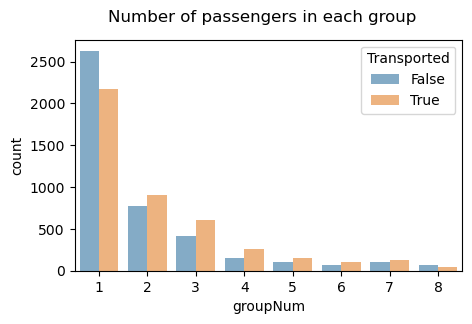

In [7]:
fig = plt.figure(figsize=(5,3))
sns.countplot(data=check, x='groupSize', hue=target, alpha=0.6)
fig.suptitle('groupSize')
plt.show()

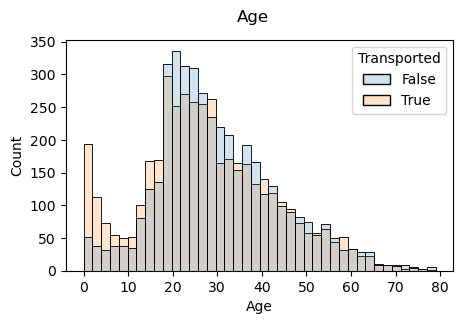

In [8]:
fig = plt.figure(figsize=(5,3))
sns.histplot(data=check, x='Age', hue=target, alpha=0.2, bins=40)
fig.suptitle('Age')
plt.show()

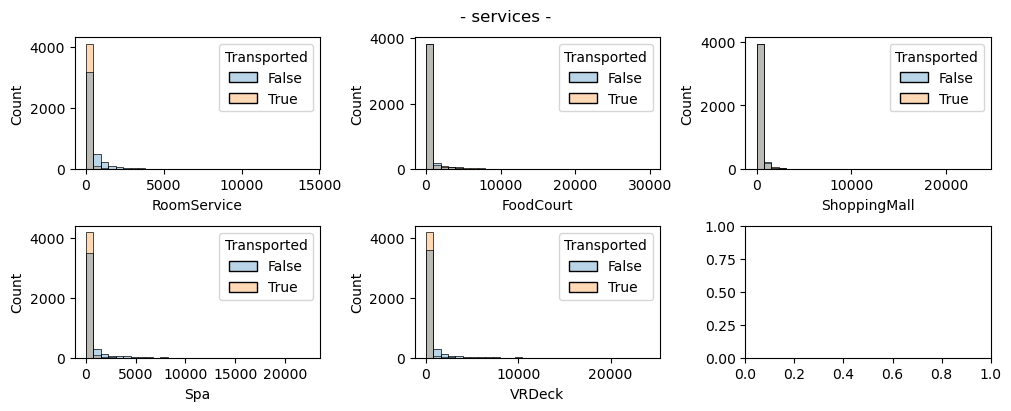

In [9]:
fig, ax = plt.subplots(2,3, figsize=(10,4), constrained_layout=True)
ax = ax.flatten()
services_li = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
for i, col in enumerate(services_li):
    sns.histplot(data=check, x=col, hue=target, ax=ax[i], bins=30, alpha=0.3)
fig.suptitle('- services -')
plt.show()

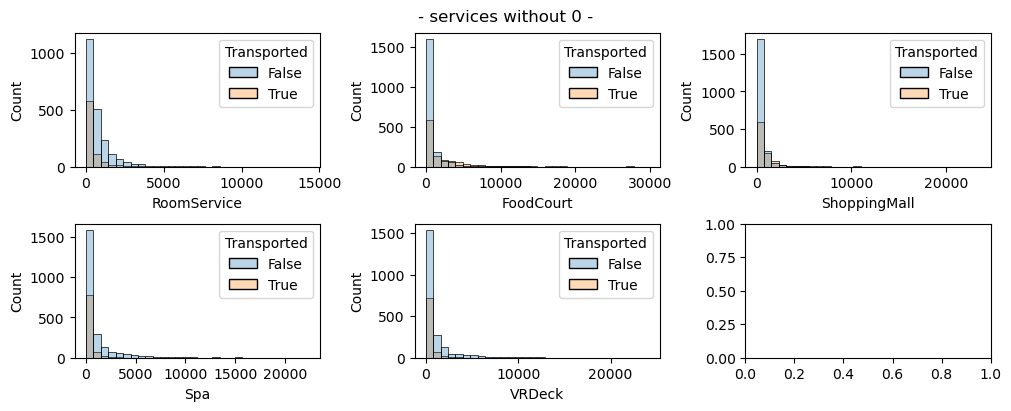

In [10]:
fig, ax = plt.subplots(2,3, figsize=(10,4), constrained_layout=True)
ax = ax.flatten()
services_li = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
for i, col in enumerate(services_li):
    sns.histplot(data=check[check[col]>0], x=col, hue=target, ax=ax[i], bins=30, alpha=0.3)
fig.suptitle('- services without 0 -')
plt.show()

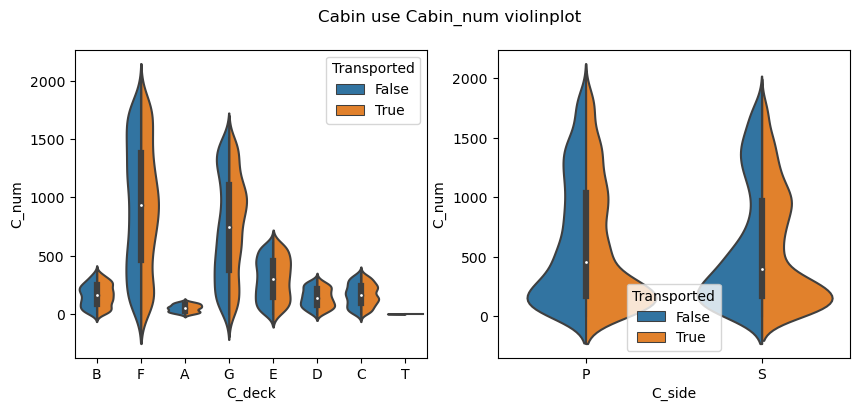

In [11]:
check['C_deck'] = check['Cabin'].str.split('/').str[0]
check['C_num'] = check['Cabin'].str.split('/').str[1].astype(float)
check['C_side'] = check['Cabin'].str.split('/').str[2]
fig, ax = plt.subplots(1,2, figsize=(10,4))
col_li = ['C_deck','C_side']
for i,col in enumerate(col_li):
    sns.violinplot(data=check, x=col, y='C_num', hue=target, split=True, ax=ax[i])
fig.suptitle('Cabin use Cabin_num violinplot')
plt.show()

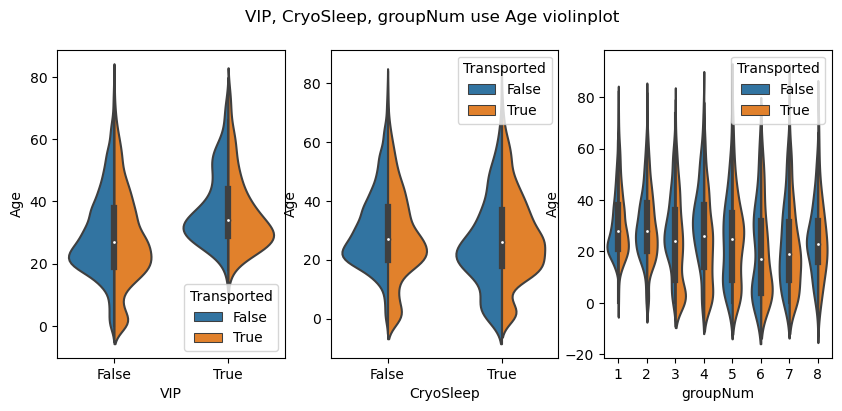

In [12]:
fig, ax = plt.subplots(1,3, figsize=(10,4))
col_li = ['VIP','CryoSleep','groupSize']
for i,col in enumerate(col_li):
    sns.violinplot(data=check, x=col, y='Age', hue=target, split=True, ax=ax[i])
fig.suptitle('VIP, CryoSleep, groupSize use Age violinplot')
plt.show()

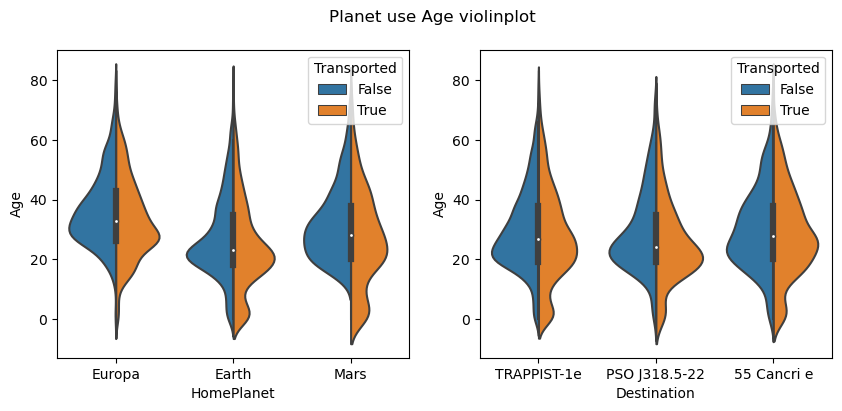

In [13]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
col_li = ['HomePlanet','Destination']
for i,col in enumerate(col_li):
    sns.violinplot(data=check, x=col, y='Age', hue=target, split=True, ax=ax[i])
fig.suptitle('Planet use Age violinplot')
plt.show()

In [14]:
pd.crosstab(check['VIP'], check['groupNum']).style.background_gradient(cmap='Blues')

groupNum,1,2,3,4,5,6,7,8
VIP,,,,,,,,
False,4603,1586,968,392,248,165,227,102
True,88,59,24,15,6,6,1,0


In [15]:
pd.crosstab(check['VIP'], check['C_deck']).style.background_gradient(cmap='Blues')

C_deck,A,B,C,D,E,F,G,T
VIP,,,,,,,,
False,215,725,687,438,846,2695,2493,5
True,35,42,41,31,15,29,0,0


In [16]:
pd.crosstab(check['HomePlanet'], check['Destination']).style.background_gradient(cmap='Blues')

Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
HomePlanet,,,
Earth,690,712,3101
Europa,886,19,1189
Mars,193,49,1475


In [17]:
pd.crosstab(check['HomePlanet'], check['C_deck']).style.background_gradient(cmap='Blues')

C_deck,A,B,C,D,E,F,G,T
HomePlanet,,,,,,,,
Earth,0,0,0,0,395,1614,2498,0
Europa,252,766,734,186,128,0,0,4
Mars,0,0,0,282,330,1110,0,0


**시각화 결과**
- **그룹 구성원 수 확인:** <br/>
혼자 온 사람이 많고 혼자왔으면 차원이동하지 못한 경우가 우세하지만 아니라면 차원이동한 경우가 더 우세 -> 추가된 칼럼: g_Id, groupSize, solo  
- **나이별 확인:**  <br/>
어릴 수록 목적지에 도착한 경우 많음. 위의 그래프와 연결해서 보았을 때 가족으로 온 경우 목적지 차원이동을 많이 하지만 혼자 온 청년층의 경우 차원이동을 잘 하지 못한 것으로 보임. 
- **서비스 이용 확인:**  <br/>
서비스 이용하지 않은 사람이 많음. 서비스 이용자 중에서는 차원이동하지 못하는 경우가 더 우세
- **deck와 side별 방번호 확인:**  <br/>
deck G의 방번호가 1000전후인 사람은 차원이동한 경우가 많음. deck S의 방번호가 1000전후인 사람은 차원이동한 경우가 많음. -> 추가된 칼럼: C_deck, C_num, C_side  
- **VIP, CrtoSleep, ppId별 violinplot 확인:**  <br/>
나이가 어리고 냉동수면중이 아니라면 차원이동 많이 하고, 나이가 어리면서 냉동수면중이라면 상대적으로 차원이동이 적은 경향이 보임. 
- **출발지와 도착지 별 violinplot 확인:**  <br/>
대체로 대칭이지만 출신행성이 Mars인 경우 나이가 어린 사람이 대부분 차원이동 됨.  
- 

# 2.데이터 전처리

In [18]:
check.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,ppId,groupNum,C_num
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000,8693.000000,8494.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,1.517773,2.035546,600.367671
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,1.054241,1.596347,511.867226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,167.250000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,427.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,2.000000,3.000000,999.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,8.000000,8.000000,1894.000000


### 2-1. Fill Age use groupNum
- 그룹크기별 나이 평균으로 Age 결측치를 채움

In [19]:
def FillAgeUseGN(X, col, func):
    group_AgeMean = X.groupby('groupSize')[col].agg(func).to_frame()
    for gS in list(X['groupSize'].unique()):
        X.loc[(X['groupSize']==gS)&(X[col].isna()), col] = group_AgeMean.loc[gS][col]
        
FillAgeUseGN(check, 'Age', 'mean')
print('Age',check['Age'].isna().sum())

Age 0


### 2-2.Fill services: RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
- Age_cat라는 나이 범주형 칼럼을 만들어 범주별로 서비스사용금액의 평균을 넣음
- 모든 서비스 금액의 총계인 total_servs 칼럼 만듬

In [20]:
# make Age_cat
Age_bins, Age_labels = [-1,19,27,38,np.inf], ['child','young adult','adult','elder']
check['Age_cat'] = pd.cut(check['Age'], bins=Age_bins, labels=Age_labels)

In [21]:
# services_li = RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
check[check['CryoSleep']==True]['VRDeck'].unique() # 다른 칼럼들도 마찬가지로 0

array([nan,  0.])

In [22]:
def FillServUseAC(X, col, agg):
    X.loc[(X['CryoSleep']==True)&(X[col].isna()), col] = 0
    Age_servMean = X.groupby('Age_cat')[col].agg(agg).to_frame()
    for age_cat in list(X['Age_cat'].unique()):
        X.loc[(X['Age_cat']==age_cat)&(X[col].isna()), col] = Age_servMean.loc[age_cat][col]

print(check[services_li].isna().sum())
for col in services_li:
    FillServUseAC(check, col, 'mean')
check[services_li].isna().sum()
check['total_servs'] = check['RoomService']+check['FoodCourt']+check['ShoppingMall']+check['Spa']+check['VRDeck']

RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
dtype: int64


RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

### 2-3. Fill Cabin: Deck, Num, Side
- groupID 별로 확인해보았을 때 대체로 같은 그룹일 경우 같은 Cabin deck, num, side를 가지는 경향성 확인 후 이를 기준으로 채워넣기
 - FamilyName 칼럼 생성 후 확인 시 같은 가족마다 같은 side에 위치하는 경향성 확인. FamilyName 또한 groupID가 같으면 같은 경향 보이므로 FamilyName을 groupID로 채워넣은 후 FamilyName으로 side 채움.

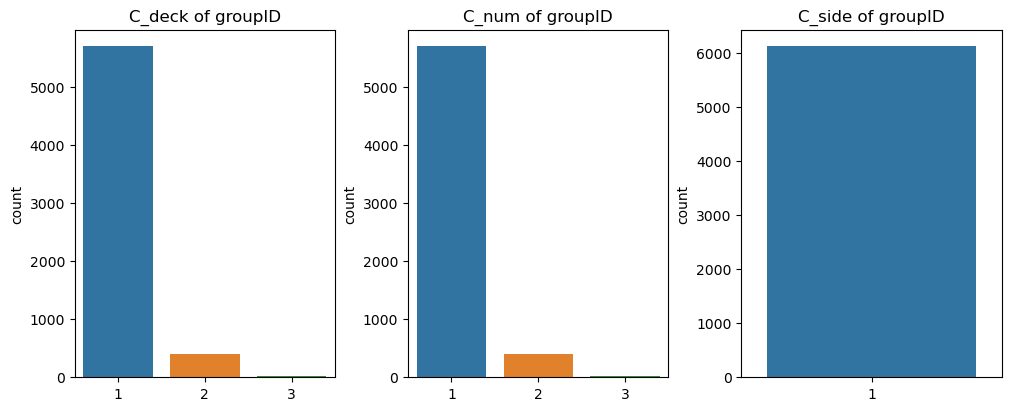

In [23]:
fig, ax = plt.subplots(1,3, figsize=(10,4), constrained_layout=True)
cabin_li = ['C_deck','C_num','C_side']
for i, col in enumerate(cabin_li):
    group = check.groupby(['g_Id',col])[col].size().unstack().fillna(0)
    sns.countplot(x=(group>0).sum(axis=1), ax=ax[i])
    ax[i].set_title('{} of groupID'.format(col))
plt.show()

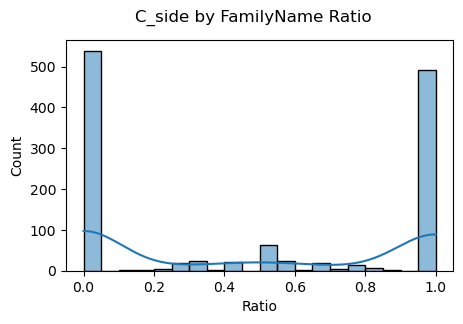

In [24]:
check['FName'] = check['Name'].str.split(' ').str[1]
fig = plt.figure(figsize=(5,3))
group = check[check['groupSize']>1].groupby(['FName','C_side'])['C_side'].size().unstack().fillna(0)
group['Ratio'] = group['P']/(group['P'] + group['S'])
sns.histplot(data=group, x='Ratio', kde=True, binwidth=0.05)
fig.suptitle('C_side by FamilyName Ratio')
plt.show()

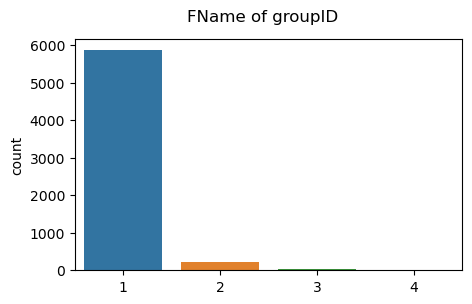

In [25]:
fig = plt.figure(figsize=(5,3))
group = check.groupby(['g_Id','FName'])['FName'].size().unstack().fillna(0)
sns.countplot(x=(group>0).sum(axis=1))
fig.suptitle('FamilyName of groupID')
plt.show()

In [26]:
############# check
ex = check.copy()

In [27]:
def FillWithCol(X, fill, col=['g_Id']):
    total_cols = col+[fill]
    
    if col==['g_Id']: # g_Id 기준
        get = X[X['groupSize']>1].groupby(total_cols)[fill].size().unstack().fillna(0)
        group = X[X['groupSize']>1].groupby(col)[fill]
    else: # multi_columns 기준
        get = X.groupby(total_cols)[fill].size().unstack().fillna(0)
        group = X.groupby(col)[fill]
    null_index = X[(X[fill].isna())&(X[col[0]].isin(get.index))].index    
    X.loc[null_index, fill] = group.transform(lambda x: x.fillna(pd.Series.mode(x)[0] 
                                                if not x.isna().values.all() else x))[null_index]

In [28]:
print(check[cabin_li].isna().sum())
for fill in cabin_li:
    FillWithCol(check, fill)
check[cabin_li].isna().sum()

C_deck    199
C_num     199
C_side    199
dtype: int64


C_deck    99
C_num     99
C_side    99
dtype: int64

In [29]:
print('FName', check['FName'].isna().sum())
FillWithCol(check, 'FName')
print('FName', check['FName'].isna().sum())

FName 200
FName 104


In [30]:
def FillCSUseFName(X, fill='C_side'):
    gb = X[X['groupSize']>1].groupby(['FName','C_side'])['C_side'].size().unstack().fillna(0)
    null_index = X[(X['C_side'].isna())&(X.loc[X['C_side'].isna(),'FName']).isin(gb.index)].index
    X.loc[null_index,'C_side'] = X.loc[null_index,'FName'].map(lambda x: gb.idxmax(axis=1)[x])
    
FillCSUseFName(check, 'C_side')
print('C_side', check['C_side'].isna().sum())

C_side 52


In [31]:
def FillFunc(X, fill, func='mode'):
    if func == 'mode':
        X[fill].fillna(X[fill].agg(func)[0], inplace=True)
    else:
        X[fill].fillna(X[fill].agg(func), inplace=True)
        
FillFunc(check, 'C_side')
print('C_side', check['C_side'].isna().sum())

C_side 0


- C_deck 별로 출발행성과 솔로 유무에 따른 경향성 확인. Earth 출신은 G, Europa 출신 중 솔로인 사람은 C, 아닌 사람은 B, Mars 출신은 G deck

In [32]:
check.groupby(['HomePlanet','Destination','solo','C_deck'])['C_deck'].size().unstack().fillna(0).style.background_gradient(cmap='Blues')

In [33]:
FillWithCol(check, 'C_deck', ['HomePlanet','Destination','solo'])
print('C_deck', check['C_deck'].isna().sum())

C_deck 99


In [34]:
FillFunc(check, 'C_deck', 'mode')
print('C_deck', check['C_deck'].isna().sum())

C_deck 0


- C_num을 확인했을 때 C_deck과 groupID의 관계를 보면 선형성을 가지는 것을 확인. 이에 맞는 방번호를 찾아주려 함.

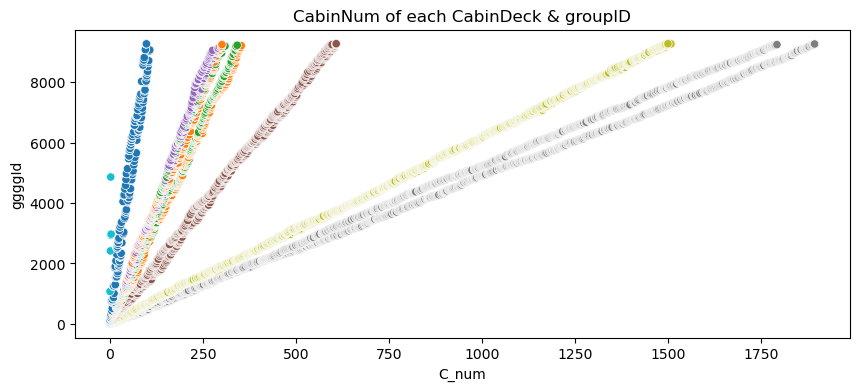

In [35]:
from sklearn.preprocessing import LabelEncoder
plt.figure(figsize=(10,4))
data = check.copy(); 
data['g_Id'] = data['g_Id'].astype(int)
sns.scatterplot(data = data, x='C_num', y='g_Id', 
                c=LabelEncoder().fit_transform(data.loc[data['C_num'].notna(),'C_deck']), cmap='tab10')
plt.title('CabinNum of each CabinDeck & groupID')
plt.show()

In [36]:
def FillCNUseLin(X, fill='C_num'):
    deck_li = sorted(list(X['C_deck'].unique()))
    X['g_Id'] = X['g_Id'].astype(int)
    for deck in deck_li:
        x_data = X.loc[(X[fill].notna())&(X['C_deck']==deck),'g_Id']
        y_data = X.loc[(X[fill].notna())&(X['C_deck']==deck),fill]
        a,c = np.polyfit(x_data, y_data, 1) # ax+by+c = 0 (b=-1)
        null_index = X.loc[(X[fill].isna())&(X['C_deck']==deck)].index
        X.loc[null_index, fill] = a*X.loc[null_index, 'g_Id'] + c

print('C_num', check['C_num'].isna().sum())
FillCNUseLin(check)
print('C_num', check['C_num'].isna().sum())

C_num 99
C_num 0


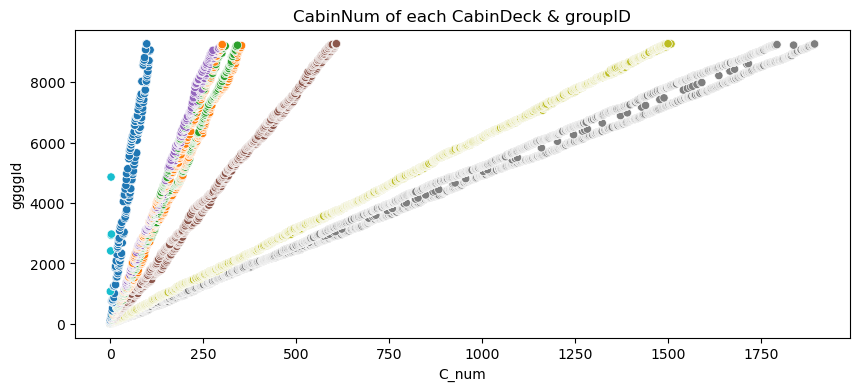

In [37]:
from sklearn.preprocessing import LabelEncoder
plt.figure(figsize=(10,4))
data = check.copy(); 
data['g_Id'] = data['g_Id'].astype(int)
sns.scatterplot(data = data, x='C_num', y='g_Id', 
                c=LabelEncoder().fit_transform(data.loc[data['C_num'].notna(),'C_deck']), cmap='tab10')
plt.title('CabinNum of each CabinDeck & groupID')
plt.show()

### 2-4.Fill HomePlanet
- groupID 별 출신행성 수를 확인 결과 같은 그룹이면 같은 행성 출신음을 알 수 있으므로 FillWithCol함수를 이용해 groupID를 기준으로 같은 HomePlanet 값을 넣어줌.

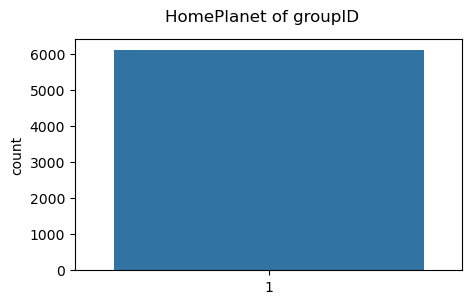

In [38]:
fig = plt.figure(figsize=(5,3))
group = check.groupby(['g_Id','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
sns.countplot(x=(group>0).sum(axis=1))
fig.suptitle('HomePlanet of groupID')
plt.show()

In [39]:
print('HomePlanet', check['HomePlanet'].isna().sum())
FillWithCol(check, 'HomePlanet')
print('HomePlanet', check['HomePlanet'].isna().sum())

HomePlanet 201
HomePlanet 111


In [40]:
check.groupby(['C_deck','HomePlanet'])['HomePlanet'].size().unstack().fillna(0).style.background_gradient('Blues')

HomePlanet,Earth,Europa,Mars
C_deck,,,
A,0.000000,261.000000,0.000000
B,0.000000,795.000000,0.000000
C,0.000000,757.000000,0.000000
D,0.000000,192.000000,291.000000
E,403.000000,131.000000,340.000000
F,1684.000000,21.000000,1156.000000
G,2547.000000,0.000000,0.000000
T,0.000000,4.000000,0.000000


In [41]:
FillWithCol(check, 'HomePlanet', ['C_deck'])
print('HomePlanet', check['HomePlanet'].isna().sum())

HomePlanet 0


### 2-5.Fill Destination
- 규칙을 찾을 수 없어 mode값을 넣어줌.

In [ ]:
print('Destination', check['Destination'].isna().sum())
FillFunc(check, 'Destination')
print('Destination', check['Destination'].isna().sum())

### 2-6.Fill VIP
- totalServices 분포 확인 결과 VVVIP 때문에 이상치로 인한 편향 발생. 상위 p=10의 퍼센트를 제거 후 평균 값을 기준으로 채워넣음(median도 가능)

In [ ]:
def FillVIP(X, p=10):     # X=dataframe, p=상위 x퍼센트 제거 후 fillvip
    mid_total = X[X['total_servs']<X['total_servs'].quantile((100-p)/100)].groupby('VIP').mean()['total_servs'].mean()
    X.loc[((X['VIP'].isna()) & (X['total_servs']>=mid_total)), 'VIP']=True
    X.loc[((X['VIP'].isna()) & (X['total_servs']<mid_total)), 'VIP']=False

# Fill VIP
print('VIP', check['VIP'].isna().sum())
FillVIP(check)
print('VIP', check['VIP'].isna().sum())

### 2-7.Fill CryoSleep
- 냉동 수면 중인 사람들은 서비스들을 이용하지 않았으므로 totalServices가 0이면 수면 중이라 여김.
- CabinDeck 별로 mode값을 채워줌.

In [ ]:
def FillCryoSleep(X):
    cond_1 = (X['total_servs']!=0)&(X['CryoSleep'].isna())
    cond_2 = (X['CryoSleep'].isna()) & (X['C_deck'].isin(['A','F','E','D','T','C']))
    cond_3 = (X['CryoSleep'].isna()) & (X['C_deck'].isin(['G','B']))
    X.loc[cond_1|cond_2, 'CryoSleep'] = False
    X.loc[cond_3, 'CryoSleep'] = True
              
# Fill CryoSleep
print('CryoSleep', check['CryoSleep'].isna().sum())
FillCryoSleep(check)
print('CryoSleep', check['CryoSleep'].isna().sum())

- 상관관계 확인

In [ ]:
corr_matrix = check.corr()
print(corr_matrix['MedHouseVal'].sort_values(ascending=False))
sns.heatmap(corr_matrix, cmap='summer', cbar=True, annot=True)
plt.show()

### 2-8.Drop columns, Create dummies
- 학습에 사용하지 않을 칼럼들 삭제
- 범주형 칼럼들 OneHot인코딩

In [ ]:
# Drop columns
drop_cols_li = ['PassengerId','Cabin','Name','g_Id','FName']

def drop_cols(X, drop_cols_li):
    X.drop(columns=drop_cols_li, inplace=True)
drop_cols(check, drop_cols_li)

In [ ]:
# Create dummies
dummy_cols_li = ['solo','Age_cat','HomePlanet','CryoSleep','Destination','VIP','C_deck','C_side']

def concat_dummies(X, dummy_cols_li):
    dummies = pd.get_dummies(X[dummy_cols_li])
    X = pd.concat([X, dummies], axis=1)
    return X.drop(columns=dummy_cols_li)
check = concat_dummies(check, dummy_cols_li)

In [ ]:
check.columns

In [64]:
import numpy as np 
import pandas as pd 
train = pd.read_csv('./spaceship-titanic/train.csv')
test = pd.read_csv('./spaceship-titanic/test.csv')
submission = pd.read_csv('./spaceship-titanic/sample_submission.csv')
train.shape, test.shape, submission.shape # check shape

# Create check columns
check = pd.concat([train, test], axis=0)
check['g_Id'] = check['PassengerId'].apply(lambda x:x.split('_')[0]).astype(int)
check['groupSize'] = check['g_Id'].map(lambda x: check['g_Id'].value_counts()[x])
check['solo'] = check['groupSize']==1
check['C_deck'] = check['Cabin'].str.split('/').str[0]
check['C_num'] = check['Cabin'].str.split('/').str[1].astype(float)
check['C_side'] = check['Cabin'].str.split('/').str[2]

def FillAgeUseGS(X, col, agg):
    group_AgeMean = X.groupby('groupSize')[col].agg(agg).to_frame()
    for gN in list(X['groupSize'].unique()):
        X.loc[(X['groupSize']==gN)&(X[col].isna()), col] = group_AgeMean.loc[gN][col]

# Fill Age
print('Age',check['Age'].isna().sum())
FillAgeUseGS(check, 'Age', 'mean')
print('Age',check['Age'].isna().sum())
print('-'*20,'Age complete','-'*20)

# Create Age_cat
Age_bins, Age_labels = [-1,19,27,38,np.inf], ['child','young adult','adult','elder']
check['Age_cat'] = pd.cut(check['Age'], bins=Age_bins, labels=Age_labels)

def FillServUseAC(X, col, agg):
    X.loc[(X['CryoSleep']==True)&(X[col].isna()), col] = 0
    Age_servMean = X.groupby('Age_cat')[col].agg(agg).to_frame()
    for age_cat in list(X['Age_cat'].unique()):
        X.loc[(X['Age_cat']==age_cat)&(X[col].isna()), col] = Age_servMean.loc[age_cat][col]

# Fill Services
services_li = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
print(check[services_li].isna().sum())
for col in services_li:
    FillServUseAC(check, col, 'mean')
print(check[services_li].isna().sum())
print('-'*20,'Services complete','-'*20)

# Create Family_Name
check['FName'] = check['Name'].str.split(' ').str[1]

def FillWithCol(X, fill, col=['g_Id']):
    total_cols = col+[fill]
    
    if col==['g_Id']: # g_Id 기준
        df = X[X['groupSize']>1].copy()
    else: # multi_columns 기준
        df = X.copy()
    get = X.groupby(total_cols)[fill].size().unstack().fillna(0)
    group = X.groupby(col)[fill]
    null_index = X[(X[fill].isna())&(X[col[0]].isin(get.index))].index    
    X.loc[null_index, fill] = group.transform(lambda x: x.fillna(pd.Series.mode(x)[0] 
                                                if not x.isna().values.all() else x))[null_index]

# Fill Cabin_Side    
cabin_li = ['C_deck','C_num','C_side']
print(check[cabin_li].isna().sum())
for fill in cabin_li:
    FillWithCol(check, fill)
check[cabin_li].isna().sum()   
    
print('FName', check['FName'].isna().sum())
FillWithCol(check, 'FName')
print('FName', check['FName'].isna().sum()) 

FillWithCol(check, 'C_side',['FName'])
print('C_side', check['C_side'].isna().sum())

def FillFunc(X, fill, func):
    if func == 'mode':
        X[fill].fillna(X[fill].agg(func)[0], inplace=True)
    else:
        X[fill].fillna(X[fill].agg(func), inplace=True)
        
FillFunc(check, 'C_side', 'mode')
print('C_side', check['C_side'].isna().sum())
print('-'*20,'Cabin_side complete','-'*20)

# Fill Cabin_Deck
FillWithCol(check, 'C_deck', ['HomePlanet','Destination','solo'])
print('C_deck', check['C_deck'].isna().sum())

FillFunc(check, 'C_deck', 'mode')
print('C_deck', check['C_deck'].isna().sum())
print('-'*20,'Cabin_deck complete','-'*20)

def FillCNUseLin(X, fill='C_num'):
    deck_li = sorted(list(X['C_deck'].unique()))
    for deck in deck_li:
        x_data = X.loc[(X[fill].notna())&(X['C_deck']==deck),'g_Id']
        y_data = X.loc[(X[fill].notna())&(X['C_deck']==deck),fill]
        a,c = np.polyfit(x_data, y_data, 1) # ax+by+c = 0 (b=-1)
        null_index = X.loc[(X[fill].isna())&(X['C_deck']==deck)].index
        X.loc[null_index, fill] = a*X.loc[null_index, 'g_Id'] + c

# Fill Cabin_Num
FillCNUseLin(check, 'C_num')
print('C_num', check['C_num'].isna().sum())
print('-'*20,'Cabin_num complete','-'*20)

# Fill HomePlanet
print('HomePlanet', check['HomePlanet'].isna().sum())
FillWithCol(check, 'HomePlanet')
print('HomePlanet', check['HomePlanet'].isna().sum())

FillWithCol(check, 'HomePlanet', ['C_deck'])
print('HomePlanet', check['HomePlanet'].isna().sum())
print('-'*20,'HomePlanet complete','-'*20)

# Fill Destination
print('Destination', check['Destination'].isna().sum())
FillFunc(check, 'Destination', 'mode')
print('Destination', check['Destination'].isna().sum())
print('-'*20,'Destination complete','-'*20)


def FillVIP(X, p=10):     # X=dataframe, p=상위 x퍼센트 제거 후 fillvip
    mid_total = X[X['total_servs']<X['total_servs'].quantile((100-p)/100)].groupby('VIP').mean()['total_servs'].mean()
    X.loc[((X['VIP'].isna()) & (X['total_servs']>=mid_total)), 'VIP']=True
    X.loc[((X['VIP'].isna()) & (X['total_servs']<mid_total)), 'VIP']=False

# Create total_servs
check['total_servs'] = check['RoomService']+check['FoodCourt']+check['ShoppingMall']+check['Spa']+check['VRDeck']

# Fill VIP
print('VIP', check['VIP'].isna().sum())
FillVIP(check)
print('VIP', check['VIP'].isna().sum())
print('-'*20,'VIP complete','-'*20)


def FillCryoSleep(X):
    cond_1 = (X['total_servs']!=0)&(X['CryoSleep'].isna())
    cond_2 = (X['CryoSleep'].isna()) & (X['C_deck'].isin(['A','F','E','D','T','C']))
    cond_3 = (X['CryoSleep'].isna()) & (X['C_deck'].isin(['G','B']))
              
    X.loc[cond_1|cond_2, 'CryoSleep'] = False
    X.loc[cond_3, 'CryoSleep'] = True
              
# Fill CryoSleep
print('CryoSleep', check['CryoSleep'].isna().sum())
FillCryoSleep(check)
print('CryoSleep', check['CryoSleep'].isna().sum())
print('-'*20,'CryoSleep complete','-'*20)

print('\n','-'*20,'complete','-'*20)

y_train = train['Transported'].copy()
X_train = check[~pd.isnull(check['Transported'])].drop(columns=['Transported'])
X_test = check[pd.isnull(check['Transported'])].drop(columns=['Transported'])

# Drop columns
drop_cols_li = ['PassengerId','Cabin','Name','g_Id','FName']

def drop_cols(X, drop_cols_li):
    X.drop(columns=drop_cols_li, inplace=True)
drop_cols(X_train, drop_cols_li)
drop_cols(X_test, drop_cols_li)

# Create dummies
dummy_cols_li = ['solo','Age_cat','HomePlanet','CryoSleep','Destination','VIP','C_deck','C_side']

def concat_dummies(X, dummy_cols_li):
    dummies = pd.get_dummies(X[dummy_cols_li])
    X = pd.concat([X, dummies], axis=1)
    return X.drop(columns=dummy_cols_li)
X_train = concat_dummies(X_train, dummy_cols_li)
X_test = concat_dummies(X_test, dummy_cols_li)

Age 270
Age 0
-------------------- Age complete --------------------
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
dtype: int64
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64
-------------------- Services complete --------------------
C_deck    299
C_num     299
C_side    299
dtype: int64
FName 294
FName 155
C_side 7
C_side 0
-------------------- Cabin_side complete --------------------
C_deck 162
C_deck 0
-------------------- Cabin_deck complete --------------------
C_num 0
-------------------- Cabin_num complete --------------------
HomePlanet 288
HomePlanet 157
HomePlanet 0
-------------------- HomePlanet complete --------------------
Destination 274
Destination 0
-------------------- Destination complete --------------------
VIP 296
VIP 0
-------------------- VIP complete --------------------
CryoSleep 310
CryoSleep 0
-------------------- CryoSleep complete ----------------

C:\Users\Playdata\AppData\Local\Temp\ipykernel_7108\883961817.py:138: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mid_total = X[X['total_servs']<X['total_servs'].quantile((100-p)/100)].groupby('VIP').mean()['total_servs'].mean()


# 3. 학습
### 3-1. 모델 준비

In [71]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_train_scaled = X_train.copy()
X_train.shape, y_train.shape, X_test.shape

((8693, 33), (8693,), (4277, 33))

In [72]:
from sklearn.linear_model import SGDClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score # 교차검증
scoring = 'accuracy'
cv = 5
score = {}

In [73]:
print(1) # SGDClassifier 
sgd_clf = SGDClassifier(random_state=42)
score['sgd_clf'] = cross_val_score(sgd_clf, X_train, y_train, cv=cv, scoring=scoring)

print(2) # LogisticRegression
logis_reg = LogisticRegression(max_iter=10000, random_state=42)
score['logis_reg'] = cross_val_score(logis_reg, X_train_scaled, y_train, cv=cv, scoring=scoring)

print(3) # DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)
score['tree_clf'] = cross_val_score(tree_clf, X_train, y_train, cv=cv, scoring=scoring)

print(4) # SVM SVC
svm_clf = SVC(random_state=42)
score['svm_clf'] = cross_val_score(svm_clf, X_train, y_train, cv=cv, scoring=scoring)

print(5) # SVM LinearSVC
lsvm_clf = LinearSVC(random_state=42)
score['lsvm_clf'] = cross_val_score(lsvm_clf, X_train, y_train, cv=cv, scoring=scoring)

print(6) # RandomForestClassifier
rndF_clf = RandomForestClassifier(random_state=42)
score['rndF_clf'] = cross_val_score(rndF_clf, X_train, y_train, cv=cv, n_jobs=1, scoring=scoring)

print(7) # KNeighborsClassifier
knn_clf = KNeighborsClassifier()
score['knn_clf'] = cross_val_score(knn_clf, X_train, y_train, cv=cv, scoring=scoring)

print(8) # GaussianNB
gNB = GaussianNB()
score['gNB'] = cross_val_score(gNB, X_train, y_train, cv=cv, scoring=scoring)

1
2
3
4
5


C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


6
7
8


C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 234, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 824, i

### 3-2. 하이퍼파라미터 탐색(GridSearchCV, RandomizedSearchCV)

In [74]:
# find best parameters for RandomForest
forest_clf = RandomForestClassifier(random_state=42)

from sklearn.model_selection import GridSearchCV
param_grid = [{'max_depth': [3, 5, 7, 10, 12, 15, 18, 20],'n_estimators': [10, 15, 20, 25, 30, 35]}]
grid_search = GridSearchCV(forest_clf, param_grid, cv=cv, scoring=scoring, return_train_score=True)
grid_search.fit(X_train, y_train)
grds_mxd, grds_n = grid_search.best_params_['max_depth'], grid_search.best_params_['n_estimators']
print(grds_mxd, grds_n) # 10,30

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {'max_depth': randint(low=2, high=50),'n_estimators': randint(low=1, high=50)}
rnd_search = RandomizedSearchCV(forest_clf, param_distributions=param_distribs,
                                n_iter=30, cv=cv, scoring=scoring, random_state=42)
rnd_search.fit(X_train, y_train)
rnds_mxd, rnds_n = rnd_search.best_params_['max_depth'], rnd_search.best_params_['n_estimators']
print(rnds_mxd, rnds_n) # 16, 47

# RandomForestClassifier
GridSearch_rf = RandomForestClassifier(max_depth=grds_mxd, n_estimators=grds_n)
score['GridSearch_rf'] = cross_val_score(GridSearch_rf, X_train, y_train, cv=cv, n_jobs=1, scoring=scoring)

RndSearch_rf = RandomForestClassifier(max_depth=rnds_mxd, n_estimators=rnds_n)
score['RndSearch_rf'] = cross_val_score(RndSearch_rf, X_train, y_train, cv=cv, n_jobs=1, scoring=scoring)

10 30
16 47


### 3-3. 학습 결과

In [75]:
high_score = 0; best_model = 'best_model'
# 교차검증 평균 정확도%
for k,v in score.items():
    print(k,':',round(np.mean(v)*100,2))
    if high_score<=np.mean(v):
        high_score = np.mean(v); best_model = k
        
print('-'*30,'\nbest_model:', best_model, round(high_score*100,2))

sgd_clf : 77.56
logis_reg : 78.79
tree_clf : 71.84
svm_clf : 78.6
lsvm_clf : 78.66
rndF_clf : 79.05
knn_clf : nan
gNB : 71.15
GridSearch_rf : 79.17
RndSearch_rf : 78.85
------------------------------ 
best_model: GridSearch_rf 79.17


# 4. 모델적용: test

In [76]:
eval(best_model).fit(X_train, y_train)
pred = eval(best_model).predict(X_test)
submission['Transported'] = pred
submission.head()

C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [70]:
# ver = '1'
# submission.to_csv('./submission_SpaceshipTitanic_{}.csv'.format(ver), index=False)

- ver1: GridSearch_rf, md=10, n=30 => 0.7898 (1309등 / 2308)